In [96]:
# @file salary-prediction-linear-regression-py.ipynb
#
# A simple example usage of Linear Regression applied to Salary dataset

### Import Libraries

In [77]:
import mlpack
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Set Plotting Options

In [95]:
%matplotlib inline
# uncomment below line to enable dark background style sheet
# plt.style.use('dark_background')

### Load and Explore the Data

In [79]:
# Load the salary dataset
data = pd.read_csv("Salary.csv")

In [80]:
# display the first 5 samples from dataframe
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [81]:
# generates basic statistical summary of the dataframe
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [82]:
# generates a concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


### Exploratory Data Analysis

<AxesSubplot:>

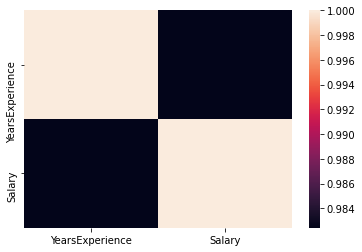

In [83]:
# compute pairwise correlation and plots
# a heatmap of the correlated columns
sns.heatmap(data.corr())

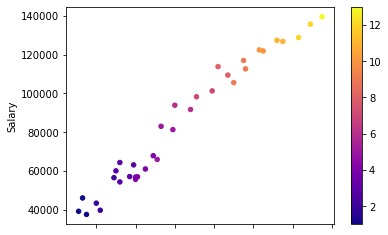

In [84]:
# 
data.plot(x="YearsExperience", y="Salary",cmap="plasma", 
          c=data["YearsExperience"].apply(lambda x: int(x)), 
          kind="scatter")
plt.show()

### Train test split

In [85]:
# Split data into features (X) and targets (y).

targets = data.Salary
features = data.drop("Salary", axis=1)

In [86]:
# Split the dataset using mlpack's preprocess_split method
output = mlpack.preprocess_split(input=features, input_labels=targets, test_ratio=0.4, seed=101)

In [87]:
# preprocess_split returns a dictionary, which we'll unpack into
# respective variables for clarity of code
X_train = output["training"]
y_train = output["training_labels"]
X_test = output["test"]
y_test = output["test_labels"]

### Training the linear model

In [88]:
# Create and train Linear Regression model.
output = mlpack.linear_regression(training=X_train,
                                  training_responses=y_train, lambda_=0.5)

In [89]:
model = output["output_model"]

### Making Predcitions on Test set

In [90]:
# Predict the values of the test data.
output = mlpack.linear_regression(input_model=model, test=X_test)

In [91]:
y_preds = output["output_predictions"].reshape(-1,1)

### Model Evaluation

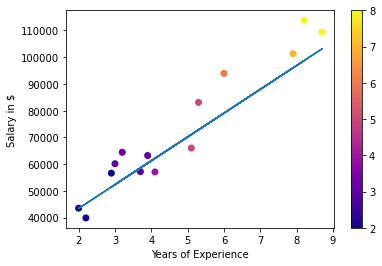

In [92]:
# plot the linear model

plt.scatter(X_test, y_test, cmap="plasma",c=X_test.astype("int"))
plt.colorbar()
plt.xlabel("Years of Experience")
plt.ylabel("Salary in $")
plt.plot(X_test, y_preds)
plt.show()

In [93]:
# utility functions for evaultion metrics

def mae(y_true, y_preds):
    return np.mean(np.abs(y_preds - y_true))

def mse(y_true, y_preds):
    return np.mean(np.power(y_preds - y_true, 2))

In [94]:
print("---- Evaluation Metrics ----")
print(f"Mean Absoulte Error: {mae(y_test, y_preds):.2f}")
print(f"Mean Squared Error: {mse(y_test, y_preds):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse(y_test, y_preds)):.2f}")

---- Evaluation Metrics ----
Mean Absoulte Error: 6776.34
Mean Squared Error: 64688553.98
Root Mean Squared Error: 8042.92
